In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesOther_p', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = ['actual_min_temp', 'actual_max_temp', 'actual_precipitation', predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.796 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.474 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.104 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.083 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.618 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=6.076 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.286 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

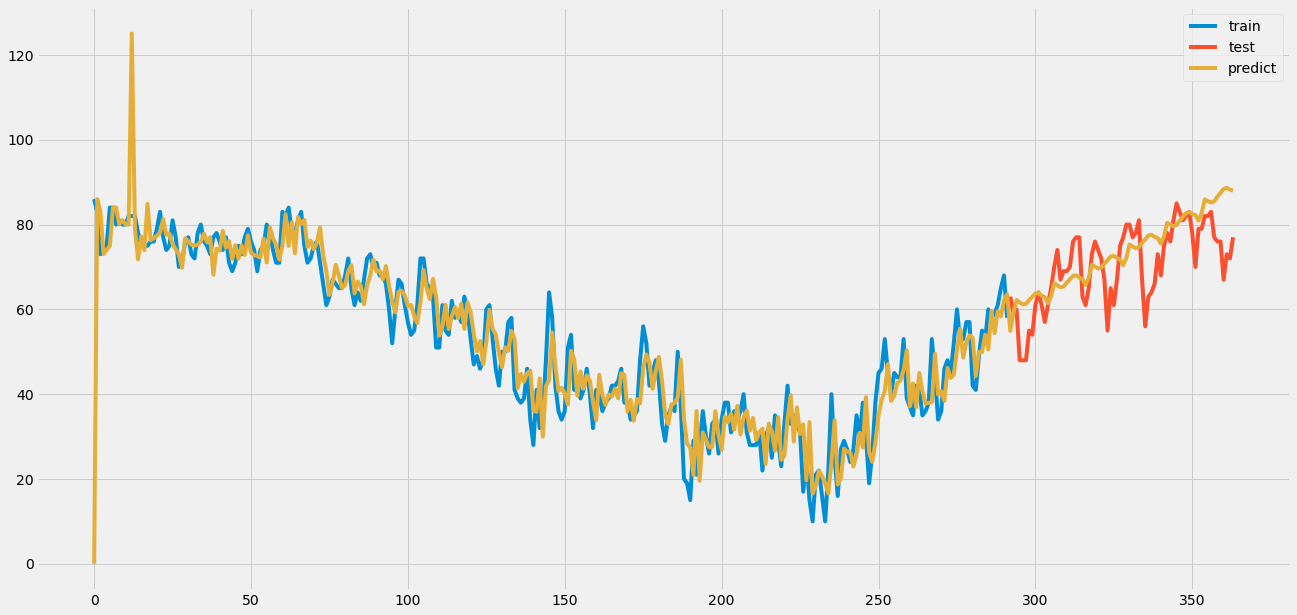

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.11232876712  Num NaN: 0'

'Test Error: 4.50555555556    Num NaN: 0'

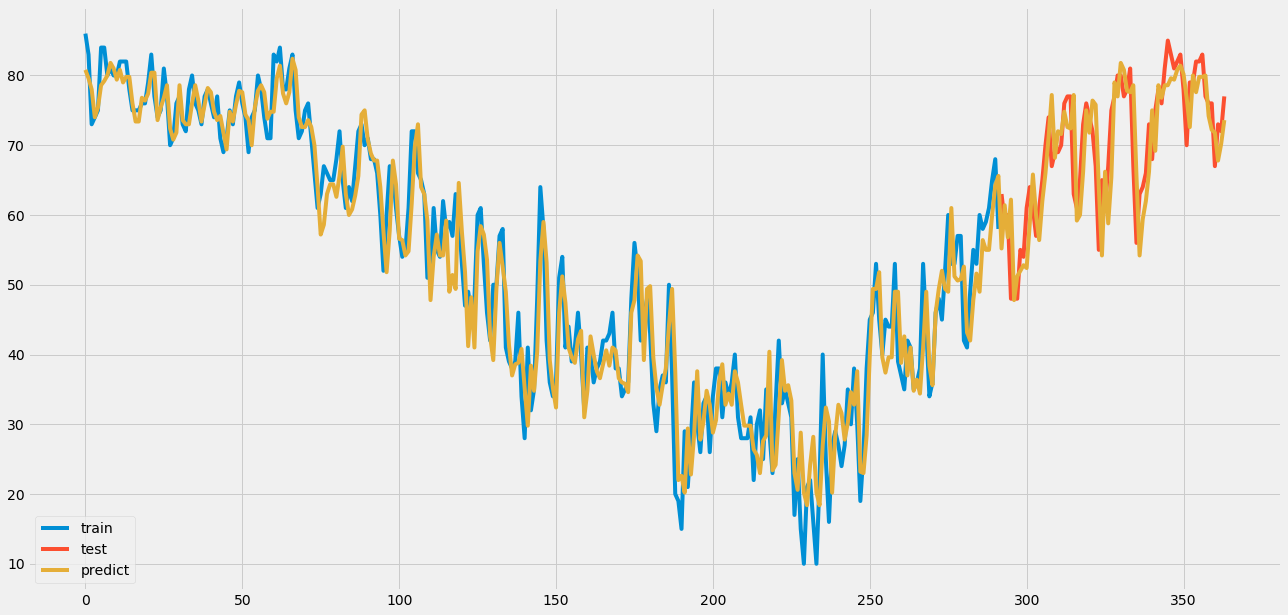

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 1.29109991957e+13  Num NaN: 0'

'Test Error: 1.73906221455e+13    Num NaN: 0'

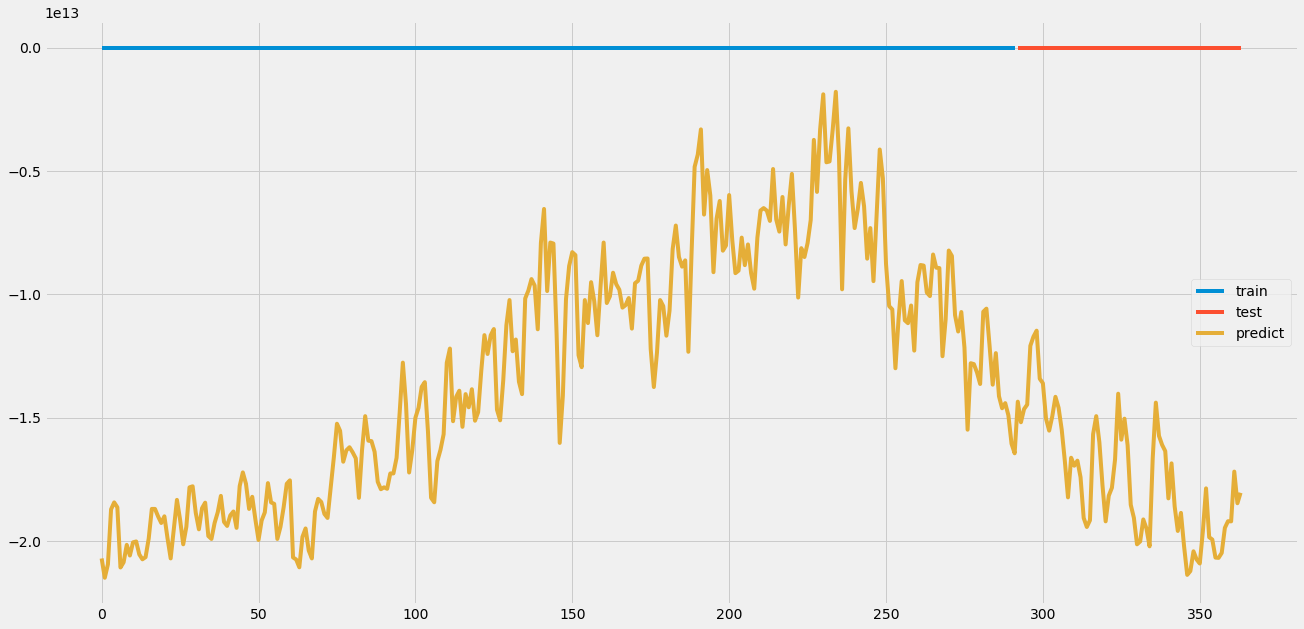

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 2.10431506849  Num NaN: 0'

'Test Error: 4.84537037037    Num NaN: 0'

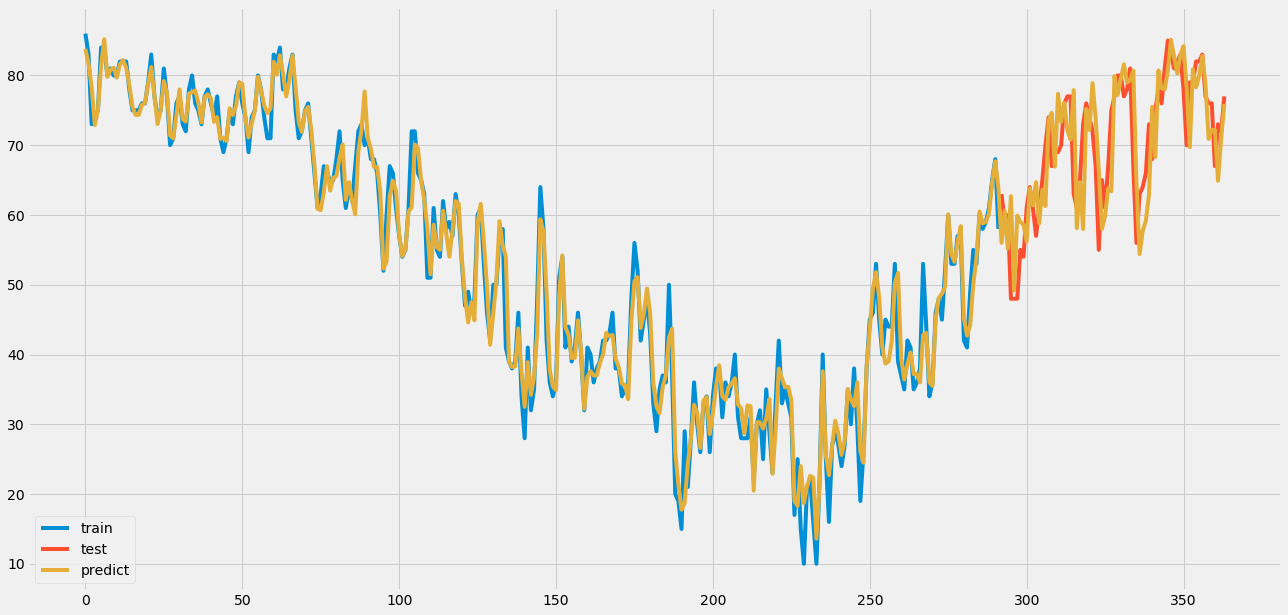

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.52947505893  Num NaN: 0'

'Test Error: 5.09707528751    Num NaN: 0'

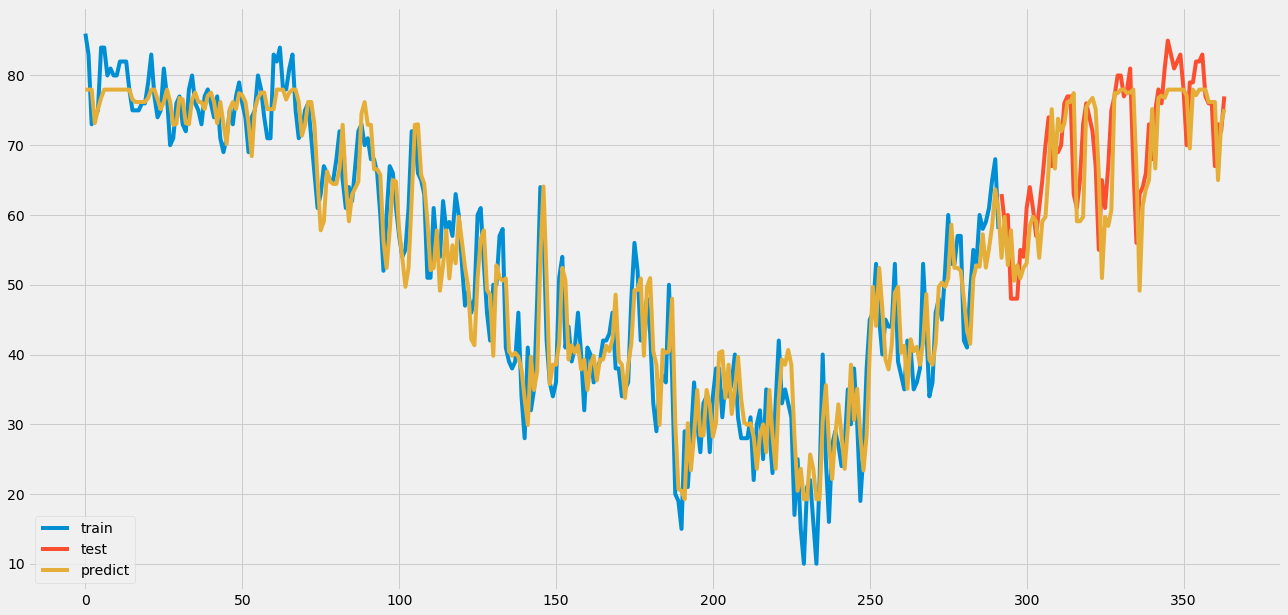

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 0.3038708782  Num NaN: 0'

'Test Error: 34.9927227128    Num NaN: 0'

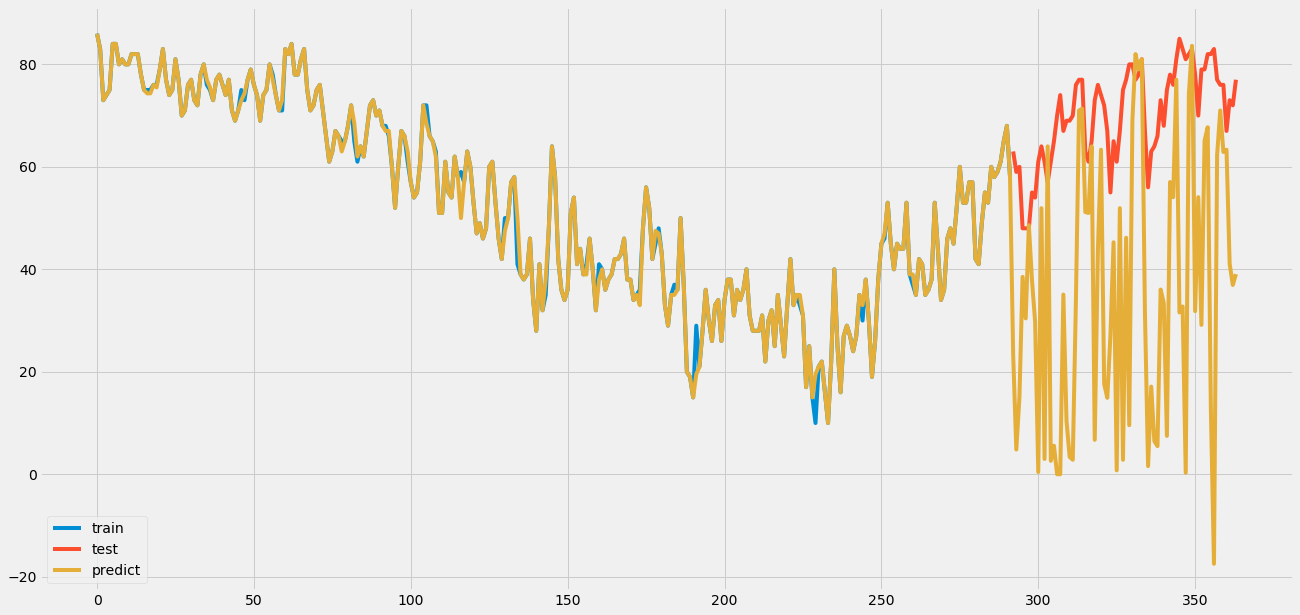

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.57814052236  Num NaN: 5'

'Test Error: 6.24115874309    Num NaN: 5'

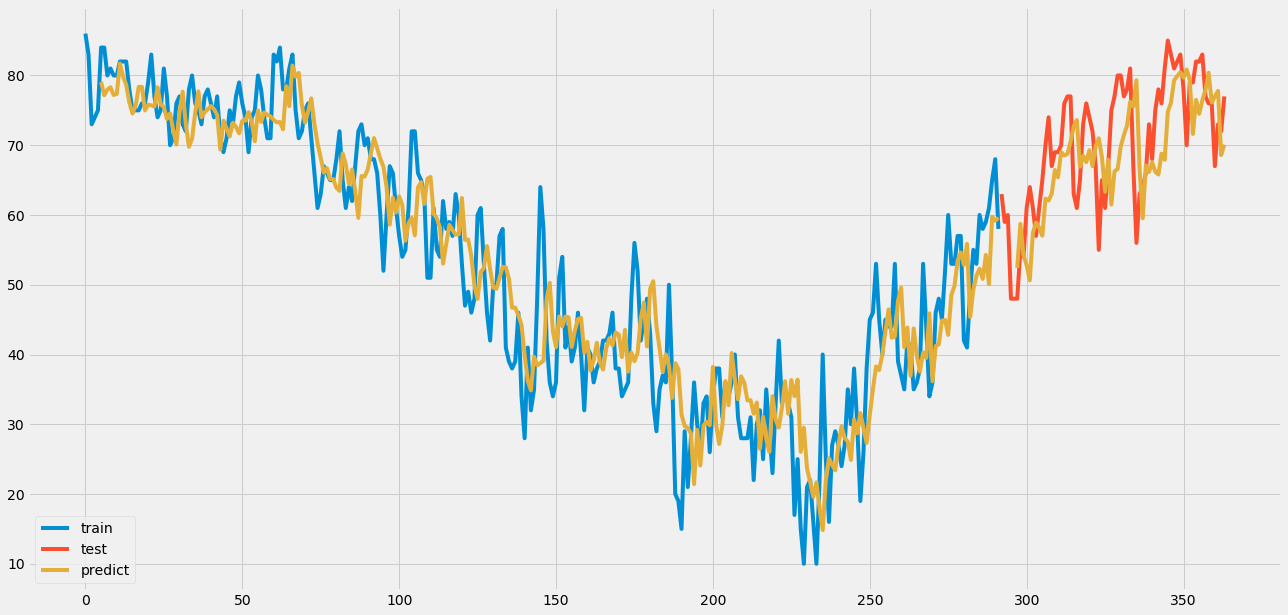

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2231 - val_loss: 0.2004
Epoch 2/10
 - 0s - loss: 0.2062 - val_loss: 0.2617
Epoch 3/10
 - 0s - loss: 0.2105 - val_loss: 0.2409
Epoch 4/10
 - 0s - loss: 0.2098 - val_loss: 0.2268
Epoch 5/10
 - 0s - loss: 0.1989 - val_loss: 0.1442
Epoch 6/10
 - 0s - loss: 0.1975 - val_loss: 0.2905
Epoch 7/10
 - 0s - loss: 0.2088 - val_loss: 0.2042
Epoch 8/10
 - 0s - loss: 0.2026 - val_loss: 0.2265
Epoch 9/10
 - 0s - loss: 0.2017 - val_loss: 0.2332
Epoch 10/10
 - 0s - loss: 0.1896 - val_loss: 0.1728


'Train Error: 13.5947761137  Num NaN: 5'

'Test Error: 12.9606808904    Num NaN: 5'

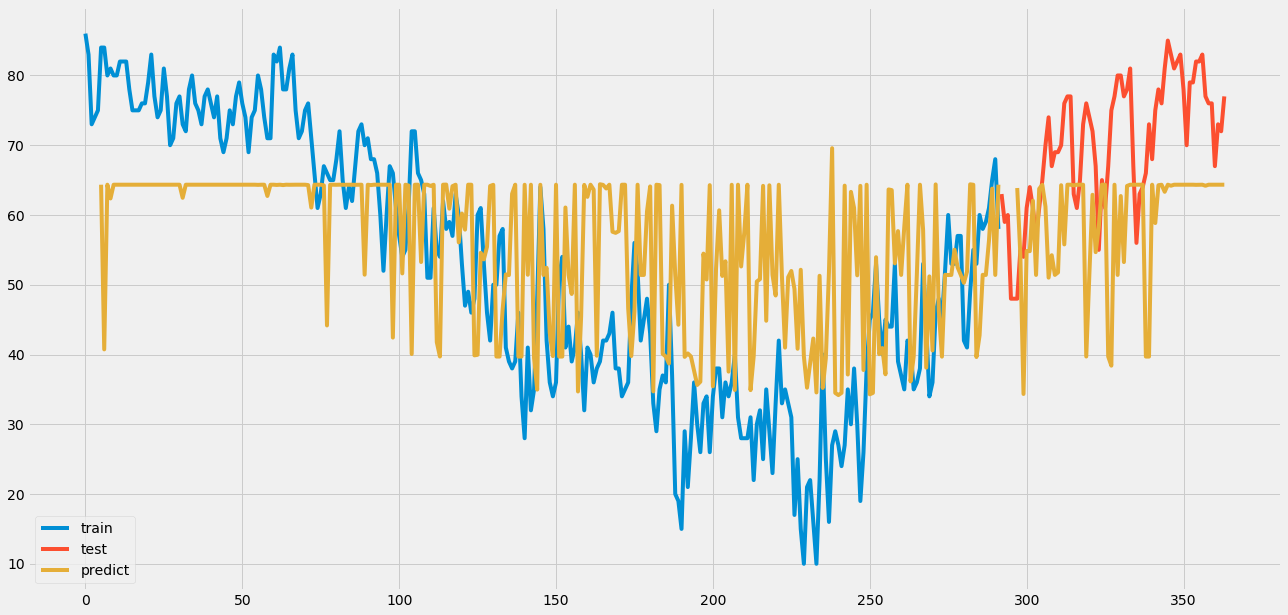

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2610 - val_loss: 0.4097
Epoch 2/10
 - 0s - loss: 0.2362 - val_loss: 0.5346
Epoch 3/10
 - 0s - loss: 0.2379 - val_loss: 0.1763
Epoch 4/10
 - 0s - loss: 0.2331 - val_loss: 0.1032
Epoch 5/10
 - 0s - loss: 0.2384 - val_loss: 0.3337
Epoch 6/10
 - 0s - loss: 0.2384 - val_loss: 0.2334
Epoch 7/10
 - 0s - loss: 0.2448 - val_loss: 0.4102
Epoch 8/10
 - 0s - loss: 0.2444 - val_loss: 0.2589
Epoch 9/10
 - 0s - loss: 0.2490 - val_loss: 0.1866
Epoch 10/10
 - 0s - loss: 0.2379 - val_loss: 0.4686


'Train Error: 19.6073198883  Num NaN: 5'

'Test Error: 35.1448484392    Num NaN: 5'

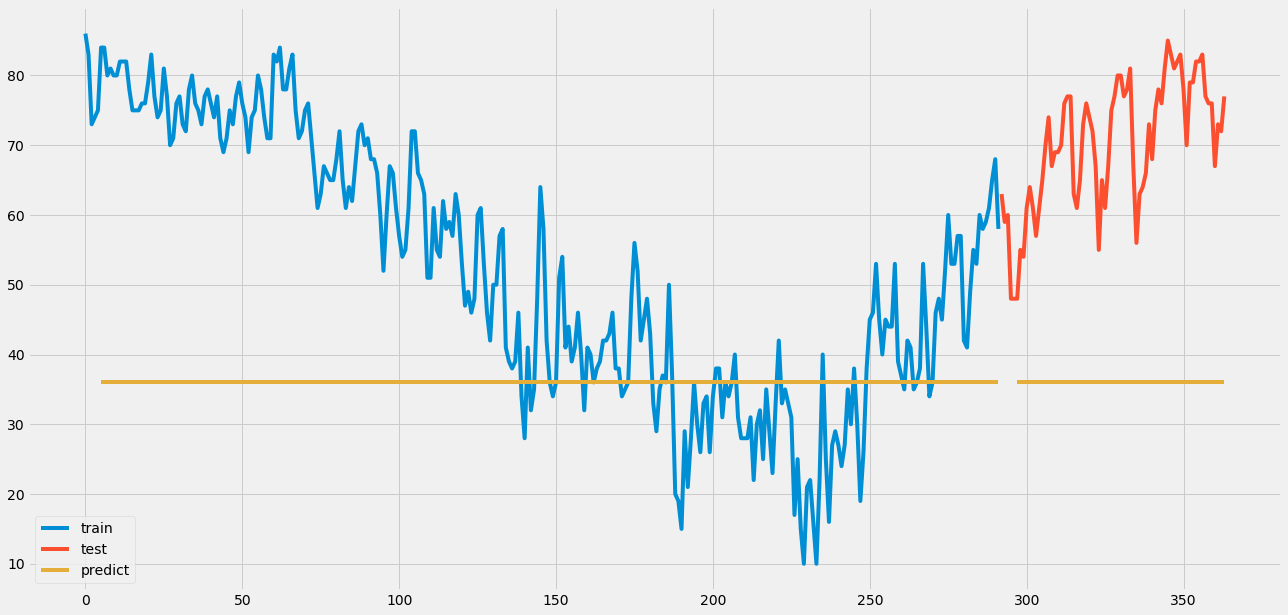

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.0103 - val_loss: 0.0042
Epoch 2/10
 - 0s - loss: 0.0031 - val_loss: 0.0024
Epoch 3/10
 - 0s - loss: 0.0024 - val_loss: 0.0018
Epoch 4/10
 - 0s - loss: 0.0018 - val_loss: 0.0015
Epoch 5/10
 - 0s - loss: 0.0016 - val_loss: 0.0011
Epoch 6/10
 - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 7/10
 - 0s - loss: 9.6985e-04 - val_loss: 0.0011
Epoch 8/10
 - 0s - loss: 9.8673e-04 - val_loss: 0.0014
Epoch 9/10
 - 0s - loss: 8.3870e-04 - val_loss: 7.3885e-04
Epoch 10/10
 - 0s - loss: 6.9291e-04 - val_loss: 7.2129e-04


'Train Error: 6.57970518119  Num NaN: 0'

'Test Error: 7.22038390901    Num NaN: 0'

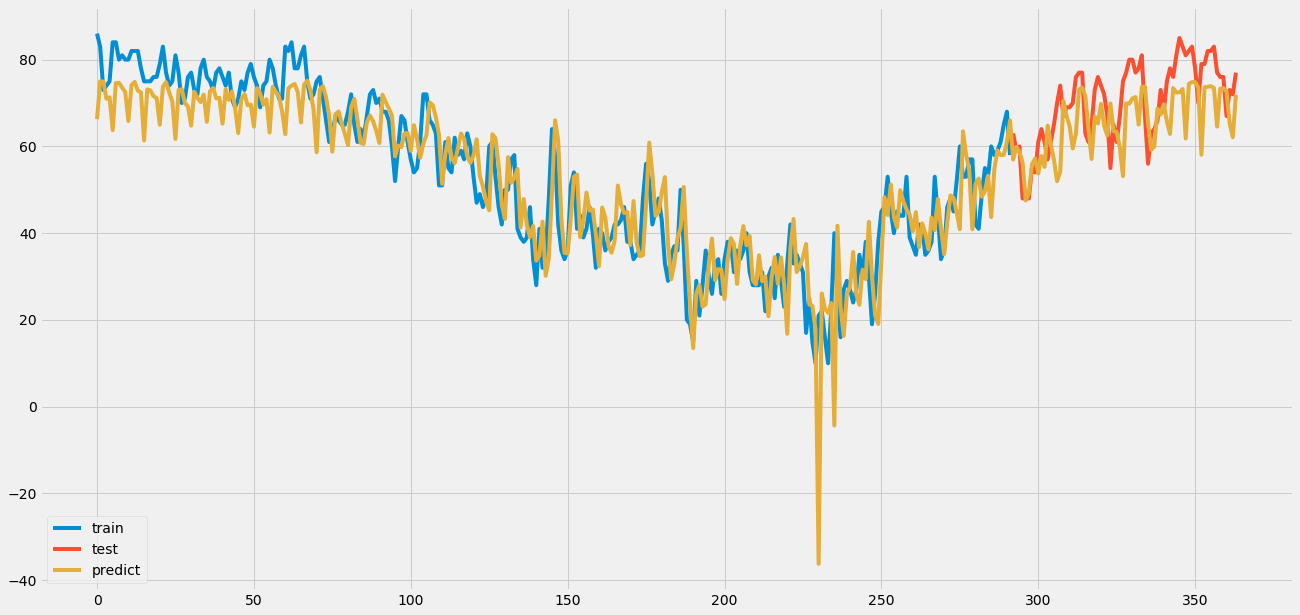

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.3589 - val_loss: 1.1734
Epoch 2/10
 - 1s - loss: 1.0634 - val_loss: 0.9234
Epoch 3/10
 - 1s - loss: 0.7954 - val_loss: 0.6804
Epoch 4/10
 - 1s - loss: 0.5850 - val_loss: 0.4873
Epoch 5/10
 - 1s - loss: 0.4248 - val_loss: 0.3127
Epoch 6/10
 - 1s - loss: 0.2883 - val_loss: 0.2322
Epoch 7/10
 - 1s - loss: 0.2253 - val_loss: 0.1800
Epoch 8/10
 - 1s - loss: 0.1796 - val_loss: 0.1411
Epoch 9/10
 - 1s - loss: 0.1502 - val_loss: 0.0772
Epoch 10/10
 - 1s - loss: 0.1193 - val_loss: 0.0629


'Train Error: 643.177125069  Num NaN: 0'

'Test Error: 634.194152832    Num NaN: 0'

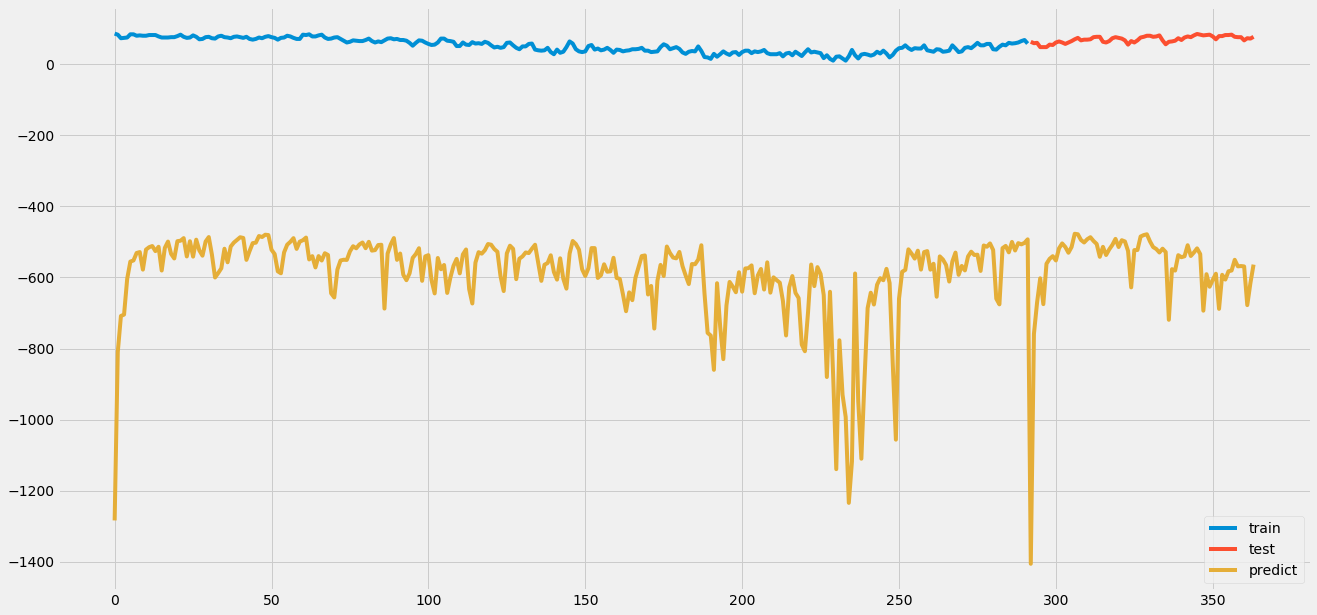

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')